In [8]:
import os
import glob

def list_exported_runs():
    """List all available exported runs in the exported_data directory."""
    export_dir = "exported_data"
    if not os.path.exists(export_dir):
        print("No exported data found.")
        return []

    csv_files = glob.glob(os.path.join(export_dir, "*.csv"))
    if not csv_files:
        print("No exported runs found.")
        return []

    csv_files.sort(key=os.path.getmtime, reverse=True)  # Sort by modification time, latest first
    print("Available exported runs:")
    for i, file in enumerate(csv_files):
        print(f"{i + 1}: {os.path.basename(file)}")
    return csv_files

def choose_run():
    """Let the user choose a run to import."""
    csv_files = list_exported_runs()
    if not csv_files:
        return None

    while True:
        try:
            choice = input("Enter the number of the run to import, 'latest' for the most recent run, or 'exit' to cancel: ").strip().lower()
            if choice == "exit":
                print("Operation cancelled.")
                return None
            elif choice == "latest":
                return csv_files[0]  # Return the latest run
            else:
                choice = int(choice) - 1
                if 0 <= choice < len(csv_files):
                    return csv_files[choice]
                else:
                    print("Invalid choice. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number, 'latest', or 'exit'.")

# Example usage
selected_run = choose_run()
if selected_run:
    print(f"You selected: {selected_run}")
else:
    print("No run selected.")

Available exported runs:
1: exported_data_20250428_125300.csv
2: exported_data_20250428_123825.csv
You selected: exported_data/exported_data_20250428_125300.csv


In [9]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv(selected_run)
data

,Timestamp,Signal 1,Signal 2,Referemce
0,0.0,0.0,0.0,1.0
1,0.1,64.0,36.0,1.0
2,0.2,65.0,35.0,1.0
3,0.3,66.0,34.0,1.0
4,0.4,67.0,33.0,1.0
...,...,...,...,...
151,15.1,12.0,88.0,27.5
152,15.2,13.0,87.0,27.5
153,15.3,14.0,86.0,27.5
154,15.4,15.0,85.0,27.5


,Timestamp,Signal 1,Signal 2
0,0.0,0.0,0.0
1,0.1,54.0,46.0
2,0.2,55.0,45.0
3,0.3,56.0,44.0
4,0.4,57.0,43.0
...,...,...,...
154,15.4,5.0,95.0
155,15.5,6.0,94.0
156,15.6,7.0,93.0
157,15.7,8.0,92.0


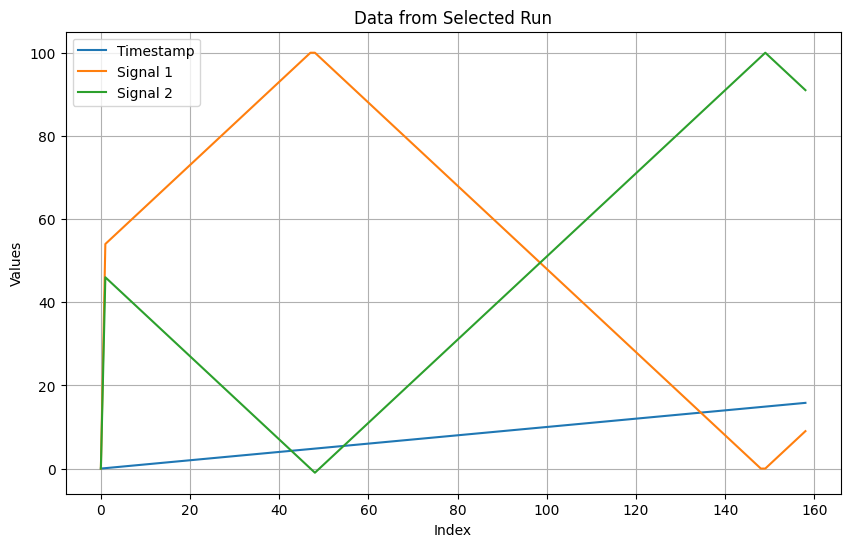

In [7]:
# Plot the data (assuming it has numerical columns to plot)
data.plot(kind='line', figsize=(10, 6))
plt.title("Data from Selected Run")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
# if we have a 127 pixel 1d camera, measuring around 10 cm, the smallest measurable distance is 0.1 cm
